In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/raw/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [5]:
data.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(1)

In [8]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

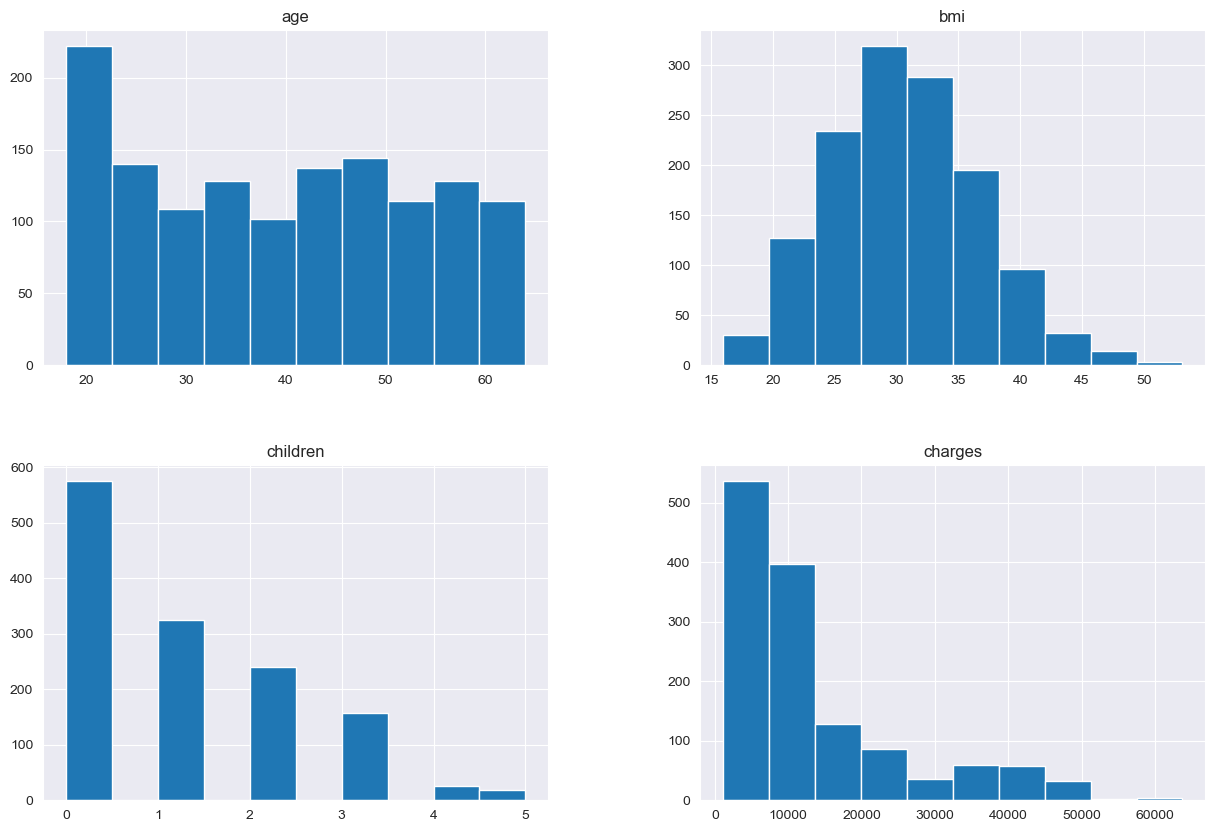

In [9]:
data.hist(figsize=(15,10))

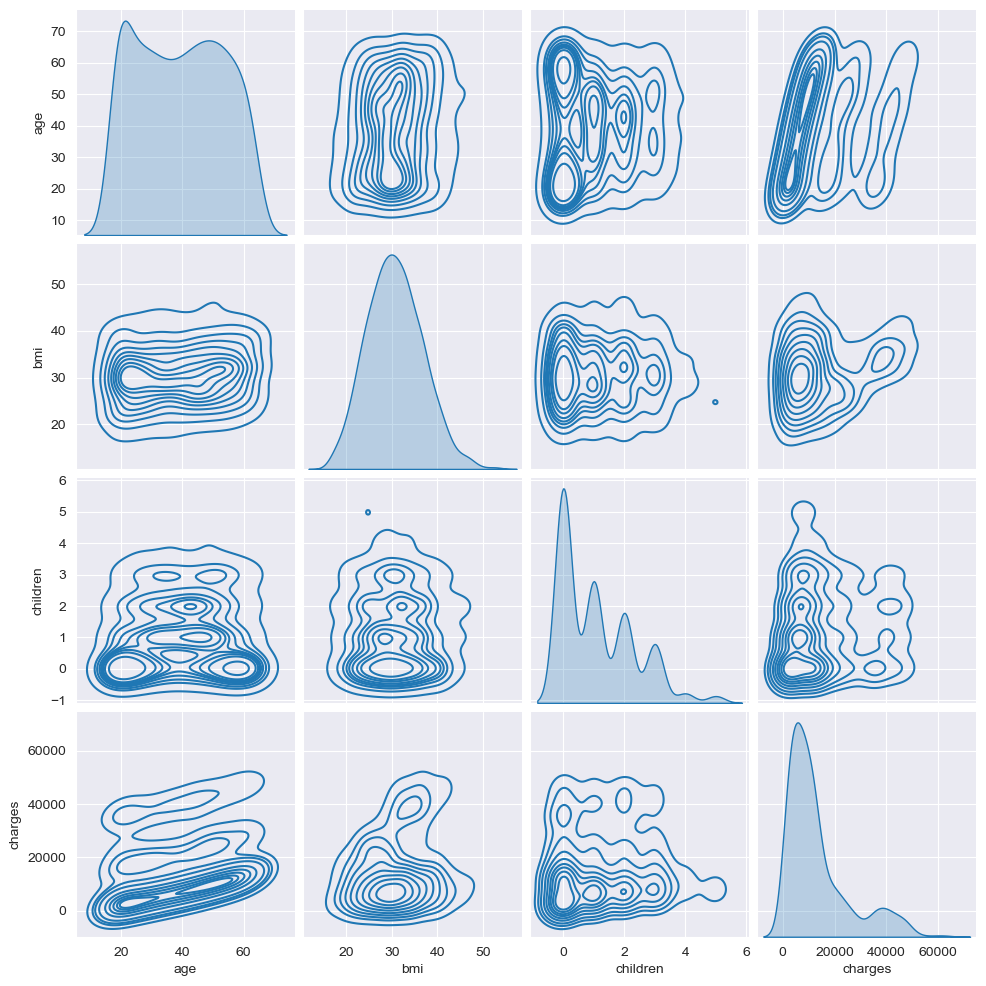

In [10]:
sns.pairplot(kind="kde", data=data)

<Axes: >

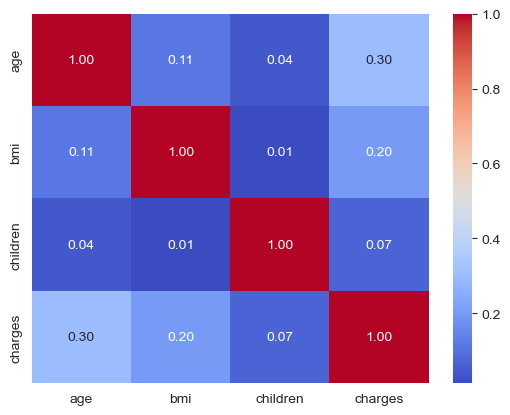

In [11]:
numerical_cols = data.select_dtypes(include=np.number).columns
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
def bmi_category_group(df):
    df["bmi_category"] = np.where(df["bmi"] < 18.5, "Underweight", np.where(df["bmi"] < 25, "Normal", np.where(df["bmi"] < 30, "Overweight", "Obese")))
    return df
bmi_category_group(data)

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,Obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


In [15]:
def age_category_group(df):
    df['age_category'] = np.where(df['age'] <= 30, "Young Adults", np.where(df['age'] <= 45, "Established Adults", "Mature Adults"))
    return df

age_category_group(data)

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Young Adults
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Young Adults
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Young Adults
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Established Adults
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Established Adults
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,Mature Adults
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,Young Adults
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,Young Adults
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,Young Adults


In [16]:
if not os.path.exists("../data/processed"):
    os.makedirs("../data/processed")
data.to_csv("../data/processed/insurance_clean.csv", index=False)
data.to_excel("../data/processed/insurance_clean.xlsx", index=False)